In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv("/content/mushroom.csv")

In [2]:
# Task 1: Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

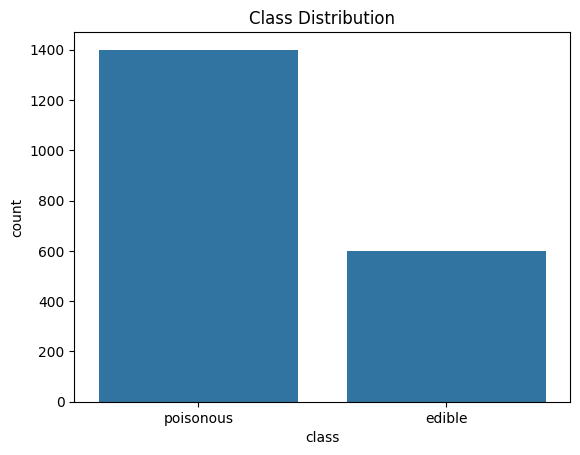

In [3]:

# Visualizing class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

In [4]:
# Encode Categorical Features
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

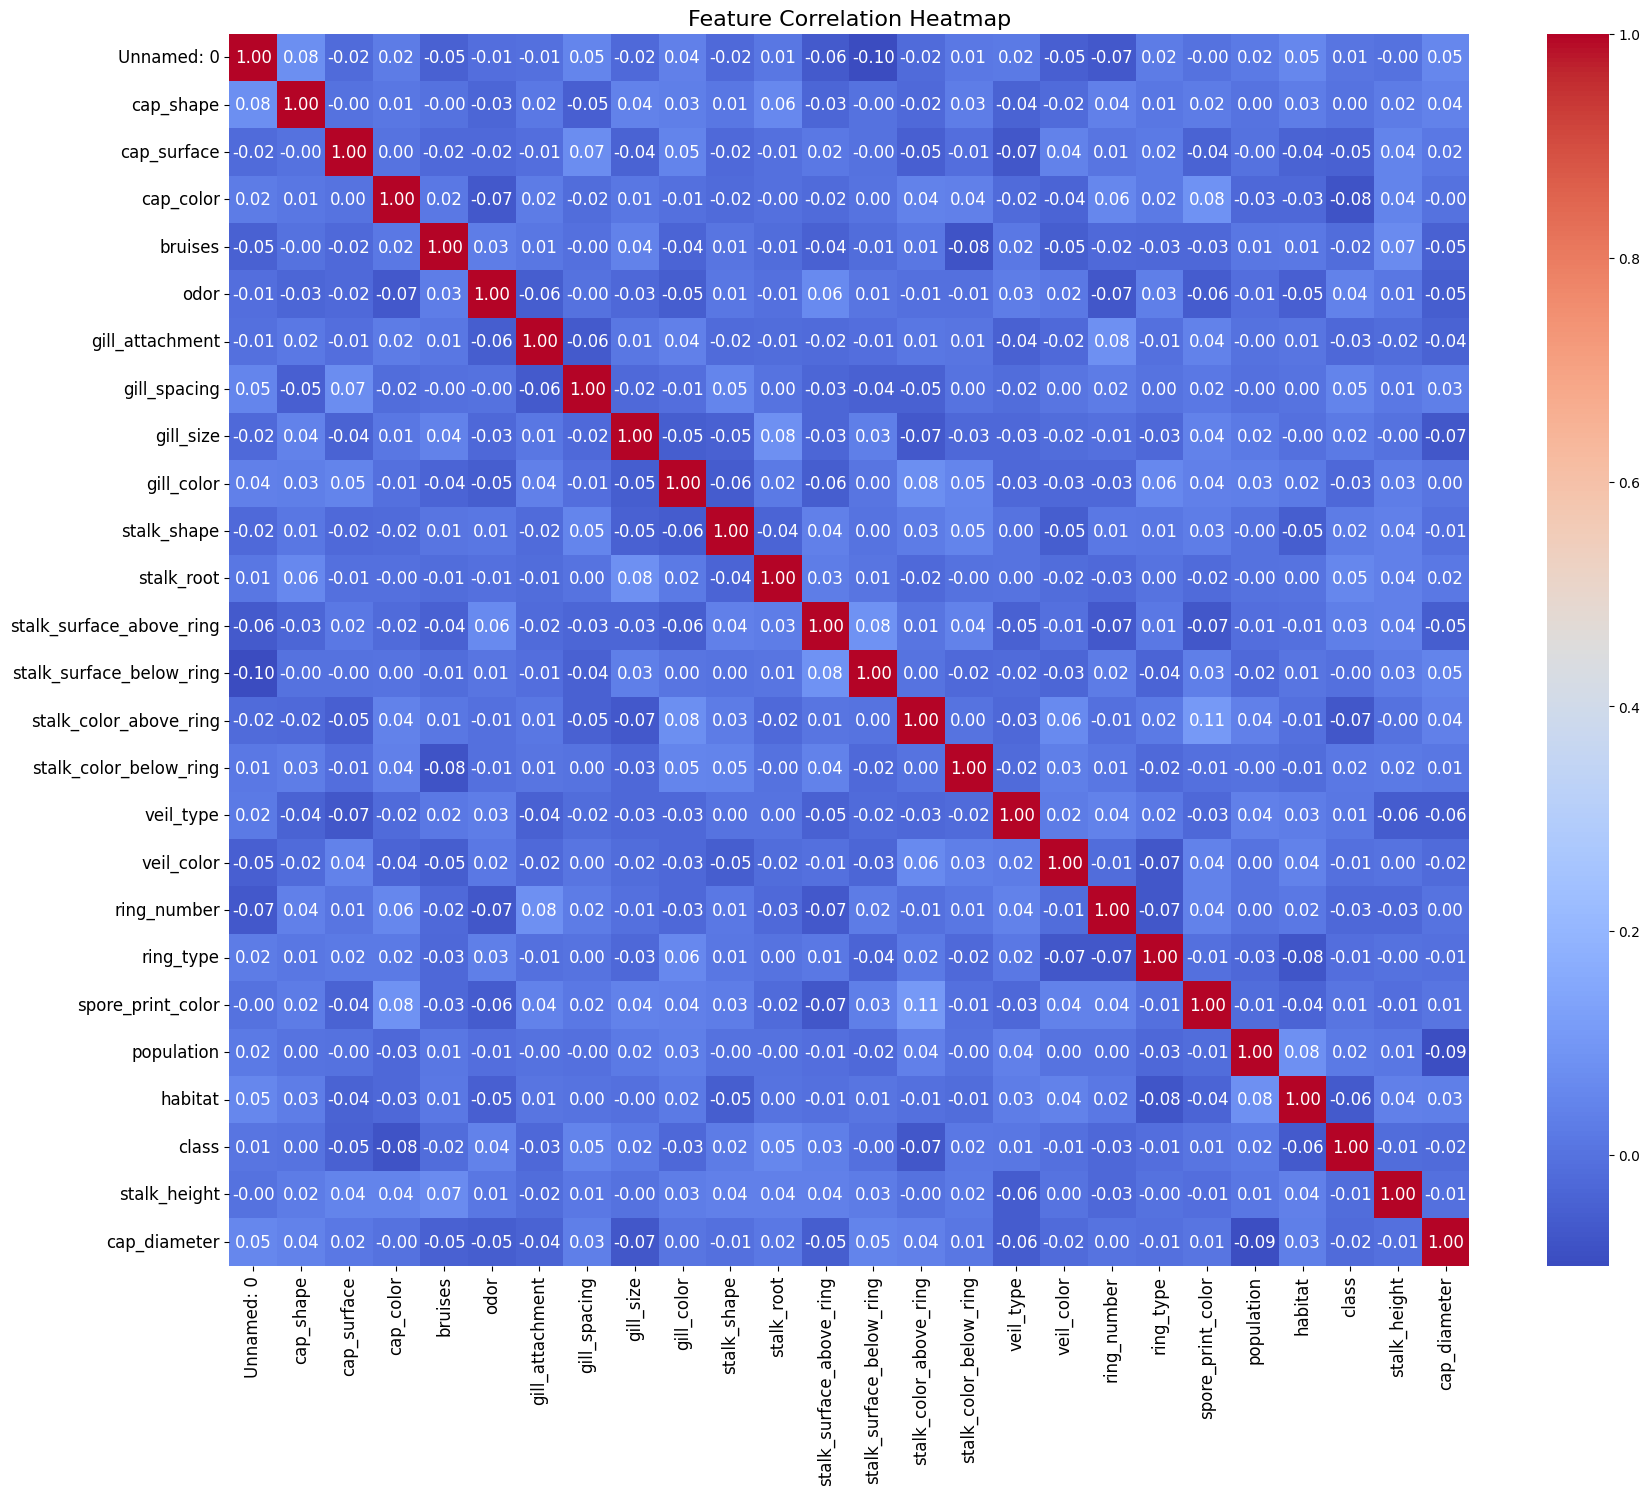

In [8]:
plt.figure(figsize=(20, 16))  # Adjust the overall figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 12})  # Adjust text size
plt.title("Feature Correlation Heatmap", fontsize=16)  # Adjust title font size
plt.xticks(fontsize=12)  # Adjust x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels
plt.show()



In [9]:
# Task 2: Data Preprocessing
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

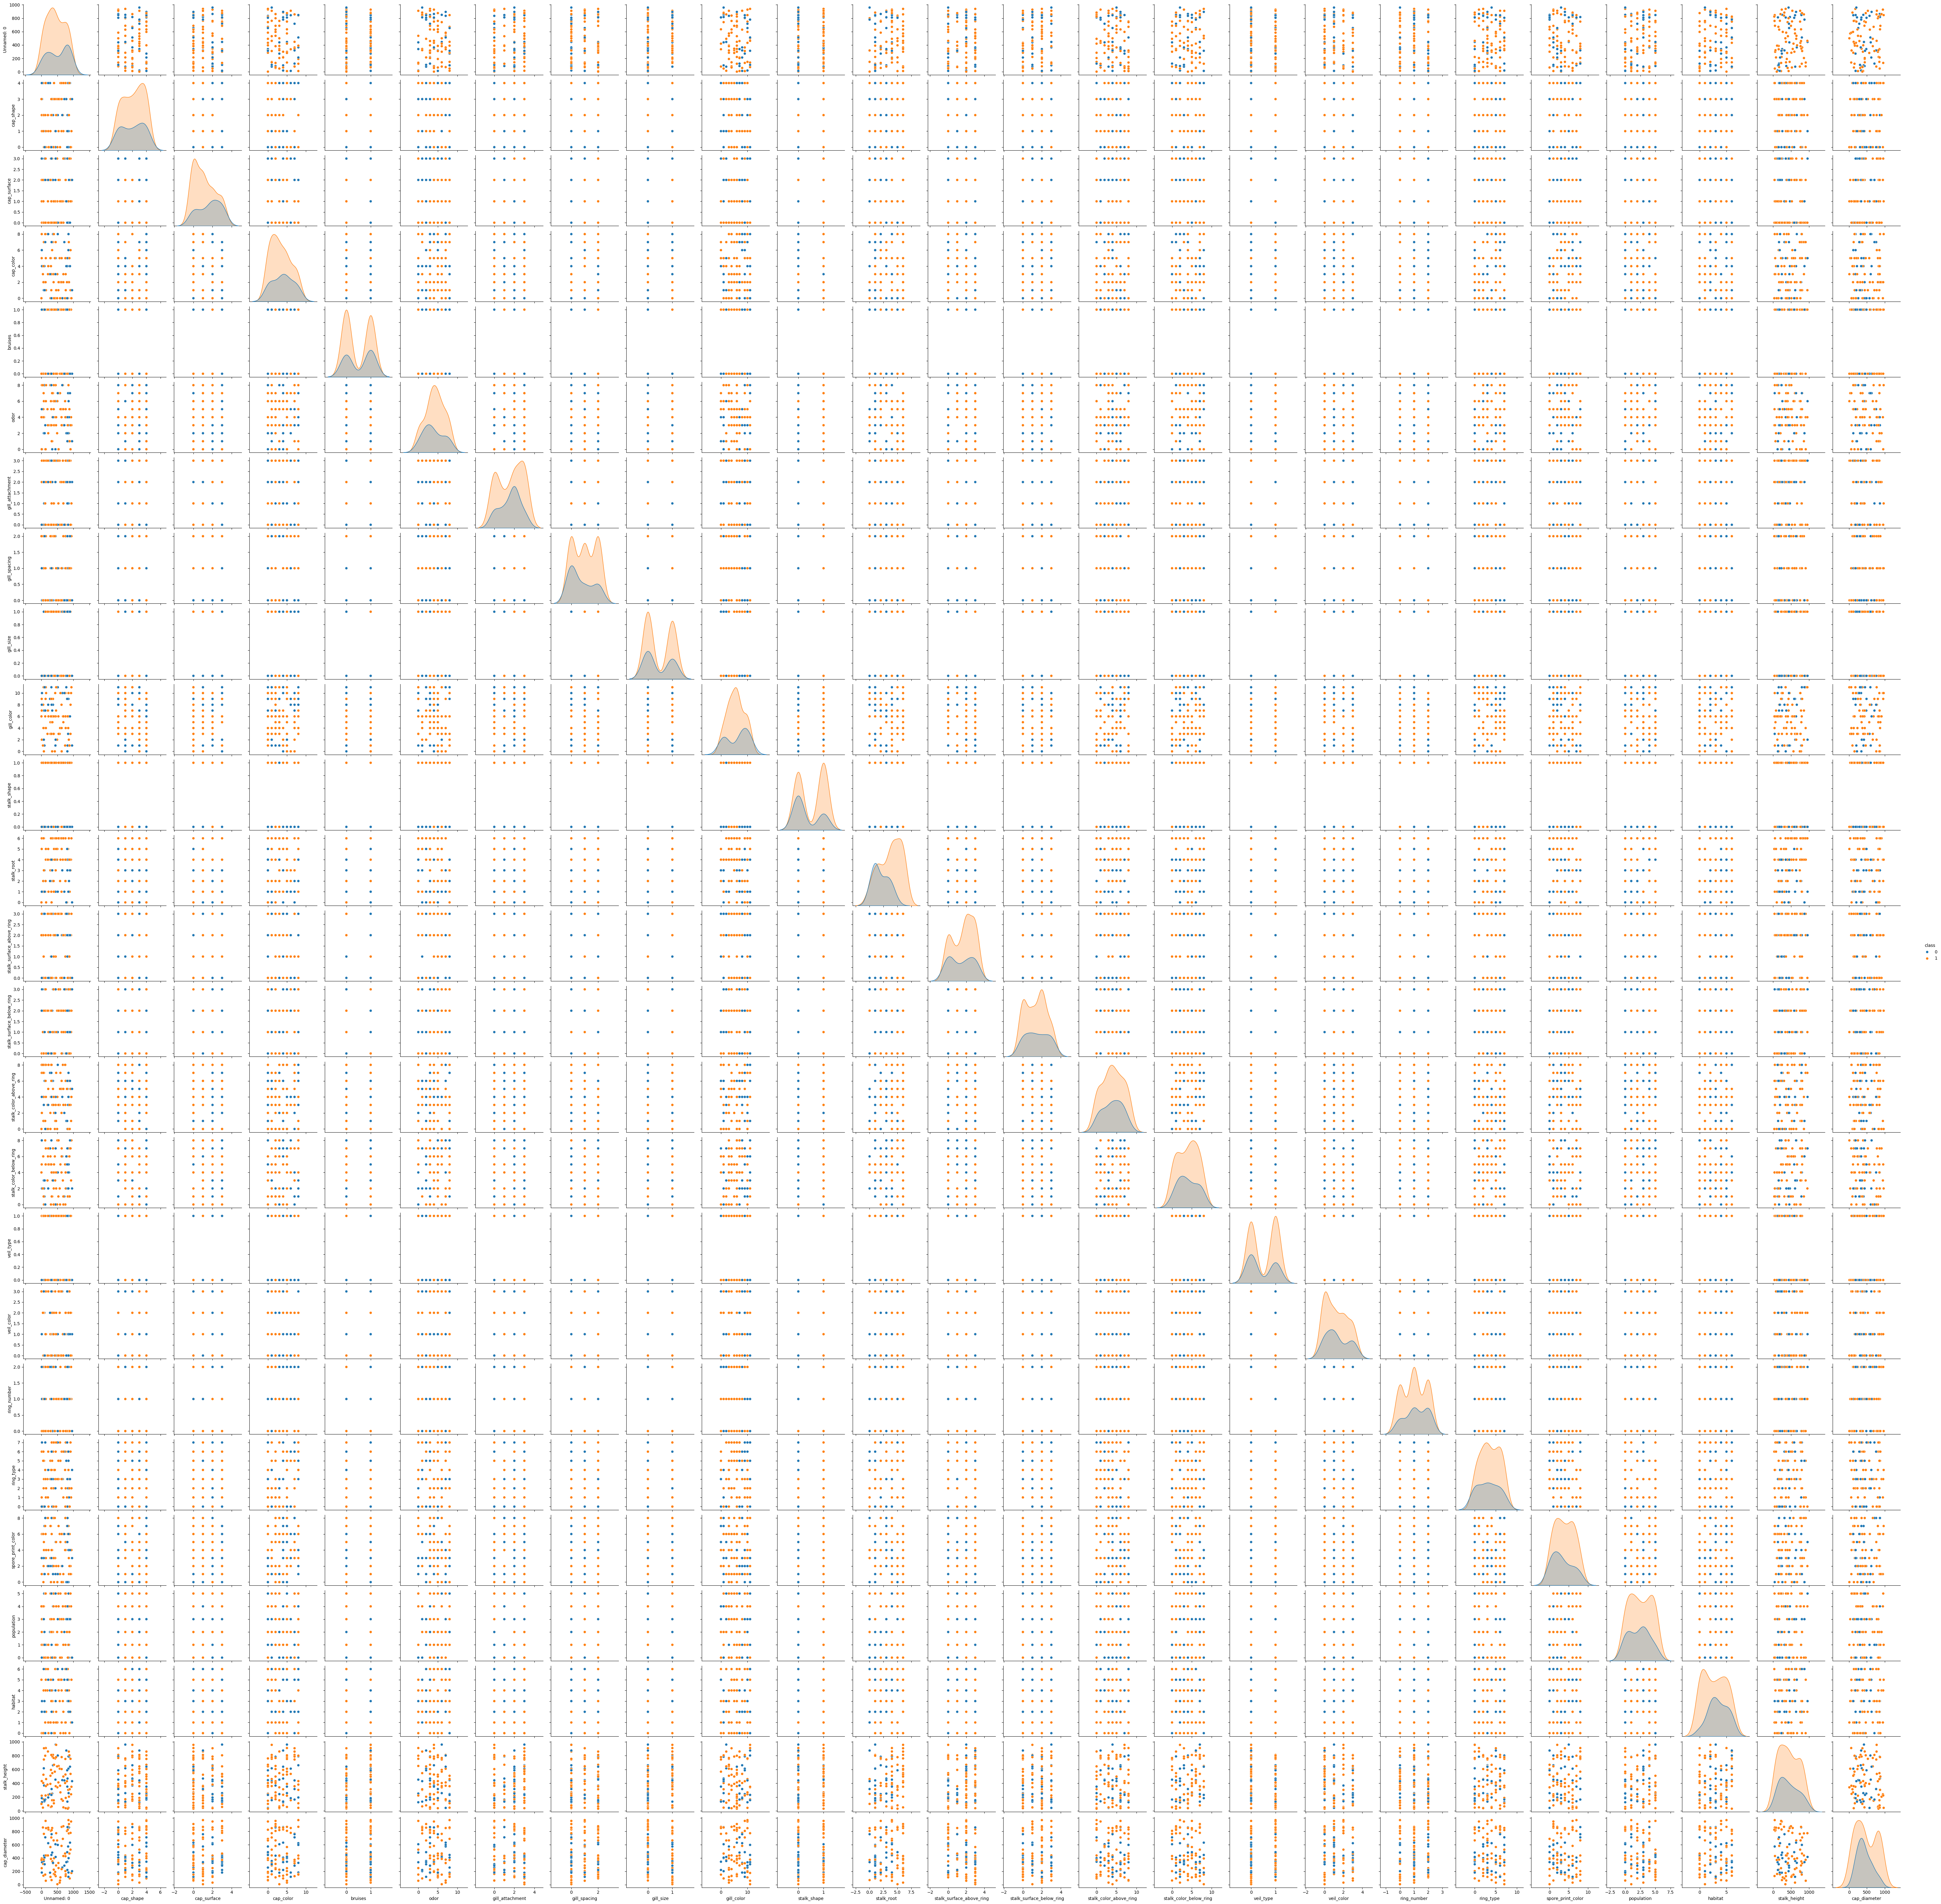

In [10]:
# Task 3: Data Visualization
sns.pairplot(df.sample(100), hue="class")
plt.show()

In [11]:
# Task 4: SVM Implementation
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


In [12]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

[[  0 133]
 [  0 267]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


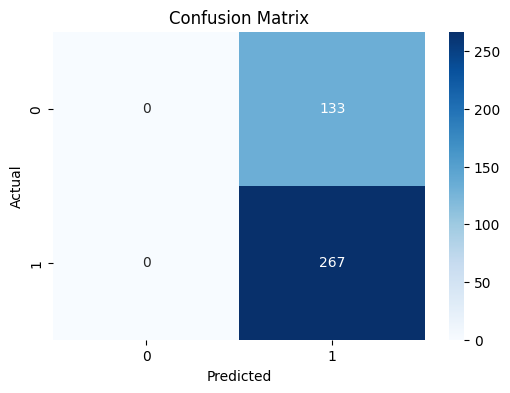

In [13]:
# Task 5: Visualization of SVM Results
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:

# Task 6: Hyperparameter Tuning
# Define the parameter grid
param_grid = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}

# Reduce dataset size for faster training
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_sample, y_train_sample)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [15]:
# Task 7: Comparison and Analysis
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_best_pred))
print(classification_report(y_test, y_best_pred))

Optimized Accuracy: 0.6675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
